In [1]:
import numpy as np
import pandas_profiling
import pandas as pd
import sklearn

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
df_total = pd.read_csv('df_total1.csv')
df_total

,Unnamed: 0,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,0,a786884,*brock,2019-01-03 04:19:00,2501 magin meadow dr in austin (tx),stray,normal,dog,2.000000,yes,...,male,yes,non-adopted,4.0,small,agreeable,family_dog,frequent,medium_high,hound_group
1,1,a706918,belle,2015-07-05 12:59:00,9409 bluegrass dr in austin (tx),stray,normal,dog,8.000000,no,...,female,yes,adopted,0.0,medium,pleaser,Not_define,medium,medium_low,sporting_group
2,2,a724273,runster,2016-04-14 06:43:00,2818 palomino trail in austin (tx),stray,normal,dog,0.916667,yes,...,male,yes,adopted,6.0,small,independent,apartment_friendly,rare,medium_high,hound_group
3,3,a665644,unknown,2013-10-21 07:59:00,austin (tx),stray,sick,cat,0.076660,yes,...,female,no,non-adopted,0.0,Unknown,Unknown,Not_define,Unknown,not_define,not_define
4,4,a682524,rio,2014-06-29 10:38:00,800 grove blvd in austin (tx),stray,normal,dog,4.000000,no,...,male,yes,adopted,2.0,large,pleaser,guard_dog,medium,high,working_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,110490,a830164,unknown,2021-03-03 02:17:00,travis (tx),owner surrender,normal,dog,0.083333,yes,...,unknown,unknown,non-adopted,0.0,small,agreeable,family_dog,rare,medium_low,toy_group
109117,110491,a829701,pee wee,2021-02-21 02:56:00,16201 biltmore avenue in travis (tx),stray,normal,dog,3.000000,no,...,male,no,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109118,110492,a765174,carson,2018-01-14 11:31:00,austin (tx),owner surrender,normal,dog,0.083333,yes,...,male,yes,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109119,110493,a829868,remy,2021-02-25 11:40:00,valdez in austin (tx),stray,normal,dog,1.000000,no,...,male,yes,adopted,5.0,small,agreeable,family_dog,frequent,medium_high,hound_group


# Data Preparation

In [7]:
# csv created this
df_total = df_total.drop('Unnamed: 0',1)

C:\Users\diedr\AppData\Local\Temp\ipykernel_16772\2350378753.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Unnamed: 0',1)


KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
# not conbine well with label coding

df_total = df_total.drop('Animal_ID',1) #@@@@@@@
df_total = df_total.drop('Name',1)
#df_total = df_total.drop('Date of Birth',1)
df_total = df_total.drop('DateTime_Intake',1)
df_total = df_total.drop('DateTime_Outcome',1)
df_total = df_total.drop('Location',1)
df_total = df_total.drop('Found_Location',1)    #@@@@@@@@@
#df_total = df_total.drop('Age_upon_Intake_weeks',1)
#df_total = df_total.drop('Age_upon_Outcome_weeks',1)
#df_total = df_total.drop('Days in Shelter',1)


In [8]:
df_total = df_total.drop('Outcome_Type',1)
df_total = df_total.drop('Outcome_Subtype',1)

C:\Users\diedr\AppData\Local\Temp\ipykernel_16772\1735493739.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Outcome_Type',1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_16772\1735493739.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Outcome_Subtype',1)


In [9]:
# Cause multicollinearity or it become irrelevant
#df_total = df_total.drop('Outcome Subtype',1)   #same info in outcome  & multicollinearity
#df_total = df_total.drop('Animal_Type',1)   # only dogs

#df_total = df_total.drop('Outcome Type',1)

cols_cat = ['Intake_type','Intake_Condition','Mix_Breed','Primary_Breed','Secondary_Breed','Main_Color','Secondary_Color','Sex','neuter/spay','Breed_size','Trainability','Breed_characteristic','Barking_level','activity_level','adopted/non-adopted','Outcome_Type','breed_group']
#df_total[cols] = df_total[cols].astype('category')
#

cols2 = ['Breed_size','Trainability','Breed_characteristic','Barking_level','activity_level','Outcome_Type','adopted/non-adopted','breed_group','Outcome_Subtype']
df_total[cols2] = df_total[cols2].astype('category')

In [9]:
cols_cat = ['Intake_type','Intake_Condition','Mix_Breed','Primary_Breed','Secondary_Breed','Main_Color','Secondary_Color','Sex','neuter/spay','Breed_size','Trainability','Breed_characteristic','Barking_level','activity_level','adopted/non-adopted','breed_group','Animal_Type']
df_total[cols_cat] = df_total[cols_cat].astype('category')

In [10]:
#df_total['Days_in_shelter'] = df_total['Days_in_Shelter'].astype('int')
#df_total['Age_upon_Intake_weeks'] = df_total['Age_upon_Intake_weeks'].astype('int')
#df_total['Age_upon_Outcome_weeks'] = df_total['Age_upon_Outcome_weeks'].astype('int')


df_total['Date of Birth'] = df_total['Date of Birth'].astype('datetime64[ns]')
#df_total['DateTime_Outcome'] = df_total['DateTime_Outcome'].astype('datetime64[ns]')
#df_total['DateTime_Intake'] = df_total['DateTime_Intake'].astype('datetime64[ns]')


In [11]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Animal_ID             109121 non-null  object        
 1   Name                  109120 non-null  object        
 2   DateTime_Intake       109121 non-null  object        
 3   Found_Location        109121 non-null  object        
 4   Intake_type           109121 non-null  category      
 5   Intake_Condition      109121 non-null  category      
 6   Animal_Type           109121 non-null  category      
 7   Age_upon_Intake       109121 non-null  float64       
 8   Mix_Breed             109121 non-null  category      
 9   Primary_Breed         109121 non-null  category      
 10  Secondary_Breed       109121 non-null  category      
 11  Main_Color            109121 non-null  category      
 12  Secondary_Color       109121 non-null  category      
 13 

x = df_total.drop('Outcome Type',1)
y = df_total['Outcome Type']

# Label Encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x_2 = x.apply(le.fit_transform)
x_2.head()

In [12]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
for i in df_total.columns:
    df_total[i] = labelencoder.fit_transform(df_total[i])
df_total


#df_total['Outcome Type'] = labelencoder.fit_transform(df_total['Outcome Type'])
#df_total

,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,Primary_Breed,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,83488,1031,58071,15478,4,5,2,18,1,35,...,1,2,1,4,3,1,2,1,2,1
1,31871,8948,20527,34171,4,5,2,24,0,131,...,0,2,0,0,2,4,0,3,3,5
2,43128,17087,28844,16635,4,5,2,16,1,32,...,1,2,0,6,3,3,1,4,2,1
3,4730,18881,725,35511,4,9,1,4,1,119,...,0,0,1,0,0,0,0,0,4,3
4,15390,16807,8742,30563,4,5,2,20,0,116,...,1,2,0,2,1,4,3,3,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,109120,18881,76109,47218,2,5,2,5,1,266,...,2,1,1,0,3,1,2,4,3,8
109117,109049,15898,76044,10185,4,5,2,19,0,89,...,1,0,0,0,5,3,1,5,3,8
109118,69521,9832,47858,35511,2,5,2,5,1,89,...,1,2,0,0,5,3,1,5,3,8
109119,109082,16711,76083,47446,4,5,2,17,0,35,...,1,2,0,5,3,1,2,1,2,1


# Separate Data (x,y,categorical and numerical)

In [13]:
x = df_total.drop('adopted/non-adopted', 1)
y = df_total['adopted/non-adopted']
x.head()

C:\Users\diedr\AppData\Local\Temp\ipykernel_16772\4183125591.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_total.drop('adopted/non-adopted', 1)


,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,Primary_Breed,...,Location,Sex,neuter/spay,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,83488,1031,58071,15478,4,5,2,18,1,35,...,0,1,2,4,3,1,2,1,2,1
1,31871,8948,20527,34171,4,5,2,24,0,131,...,0,0,2,0,2,4,0,3,3,5
2,43128,17087,28844,16635,4,5,2,16,1,32,...,0,1,2,6,3,3,1,4,2,1
3,4730,18881,725,35511,4,9,1,4,1,119,...,0,0,0,0,0,0,0,0,4,3
4,15390,16807,8742,30563,4,5,2,20,0,116,...,0,1,2,2,1,4,3,3,0,9


In [14]:
df_num = df_total.drop(cols_cat,axis=1)
#df_num = df_num.drop('DateTime_Intake', axis=1)
#df_num = df_num.drop('DateTime_Outcome',axis=1)
df_num



,Animal_ID,Name,DateTime_Intake,Found_Location,Age_upon_Intake,DateTime_Outcome,Date of Birth,Age_upon_Outcome,Location,Days_in_shelter
0,83488,1031,58071,15478,18,67407,5632,17,0,4
1,31871,8948,20527,34171,24,23285,2175,23,0,0
2,43128,17087,28844,16635,16,33437,5005,16,0,6
3,4730,18881,725,35511,4,558,4432,4,0,0
4,15390,16807,8742,30563,20,9592,3252,19,0,2
...,...,...,...,...,...,...,...,...,...,...
109116,109120,18881,76109,47218,5,89868,7070,4,0,0
109117,109049,15898,76044,10185,19,89699,5893,18,0,0
109118,69521,9832,47858,35511,5,55493,5947,6,0,0
109119,109082,16711,76083,47446,17,89872,6780,16,0,5


# One Hot Encoder

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_total).toarray())      # modify here df_num for df_total

df_total = enc_df
df_total
#df_codes = df_total.join(enc_df)
#df_codes

x = df_total.drop('adopted/non-adopted',1)
y = df_total['adopted/non-adopted']
x.head()

# Features Selections

In [15]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score
from sklearn.metrics import f1_score

scorer = make_scorer(f1_score, average = 'weighted')

from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score
from sklearn.metrics import f1_score

scorer = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           'f1_weighted': make_scorer(f1_score, average = 'weighted')
           }


# Random Forest (feature selection)

In [17]:
### Forward Selection - Random Forest
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs0 = SFS(RandomForestClassifier(),
          k_features=(3,16),
          forward=True,
          floating=False,
          scoring = scorer,
          cv = 0)
sfs0.fit(x,y)
sfs0.k_feature_names_

('Intake_type',
 'Intake_Condition',
 'Age_upon_Intake',
 'Mix_Breed',
 'Primary_Breed',
 'Main_Color',
 'Secondary_Color',
 'Date of Birth',
 'Age_upon_Outcome',
 'Sex',
 'neuter/spay',
 'Days_in_shelter',
 'activity_level')

D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


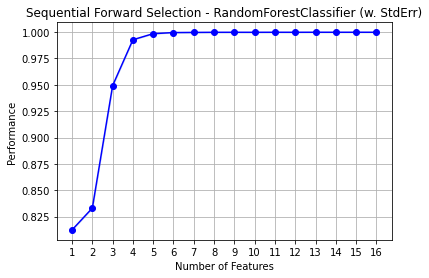

In [18]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#matplotlib.use( 'tkagg' )   # 1 option
fig0 = plot_sfs(sfs0.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection - RandomForestClassifier (w. StdErr)')
plt.grid()
plt.show()

#fig0.savefig('demo0.png', bbox_inches='tight')   # 2 option
#fig0.savefig('demo.pdf')   # 3 option

The y-axis, the performance label indicates the R-squared values for the different numbers of features.

In [19]:
### Backward Selection - Random forest
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestClassifier(),
          k_features=(3,16),
          forward=False,
          floating=False,
          scoring = scorer,
          cv = 0)
sfs1.fit(x,y)
sfs1.k_feature_names_

('Intake_type',
 'Intake_Condition',
 'Animal_Type',
 'Primary_Breed',
 'Main_Color',
 'Secondary_Color',
 'Date of Birth',
 'Age_upon_Outcome',
 'Sex',
 'neuter/spay',
 'Days_in_shelter',
 'Breed_size',
 'Trainability',
 'Barking_level',
 'activity_level',
 'breed_group')

D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


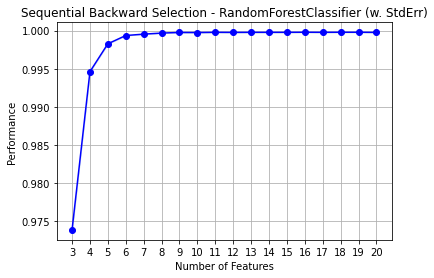

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#matplotlib.use( 'tkagg' )   # 1 option
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection - RandomForestClassifier (w. StdErr)')
plt.grid()
plt.show()

#fig1.savefig('demo1.png', bbox_inches='tight')  # 2 option
#fig1.savefig('demo.pdf')   # 3 option

In [21]:
### Wrapper Bi Selection - Random Forest
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs2 = SFS(RandomForestClassifier(),
          k_features=(3,16),
          forward=True,
          floating=True,
          scoring = scorer,
          cv = 0)
sfs2.fit(x,y)
sfs2.k_feature_names_

('Intake_type',
 'Intake_Condition',
 'Animal_Type',
 'Primary_Breed',
 'Secondary_Breed',
 'Main_Color',
 'Secondary_Color',
 'Date of Birth',
 'Age_upon_Outcome',
 'Sex',
 'neuter/spay',
 'Days_in_shelter',
 'Barking_level')

D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


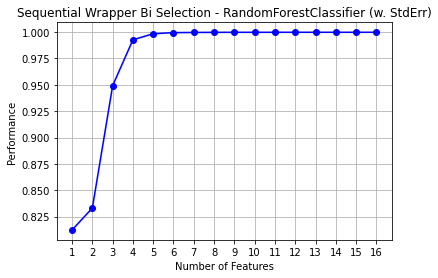

In [22]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#matplotlib.use( 'tkagg' )   # 1 option
fig2 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.title('Sequential Wrapper Bi Selection - RandomForestClassifier (w. StdErr)')
plt.grid()
plt.show()

#fig2.savefig('demo2.png', bbox_inches='tight')
#fig2.savefig('demo.pdf')   # 3 option

# KNN  (Feature Selection)

In [23]:
### Forward Selection - KNN
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs0_k = SFS(KNeighborsClassifier(),
           k_features=(3,16),
           forward=True,
           floating=False,
           scoring = scorer,
           cv = 0)
sfs0_k.fit(x,y)
sfs0_k.k_feature_names_

('Intake_type',
 'Intake_Condition',
 'Animal_Type',
 'Mix_Breed',
 'Date of Birth',
 'Age_upon_Outcome',
 'Sex',
 'neuter/spay',
 'Days_in_shelter',
 'Trainability',
 'activity_level')

D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


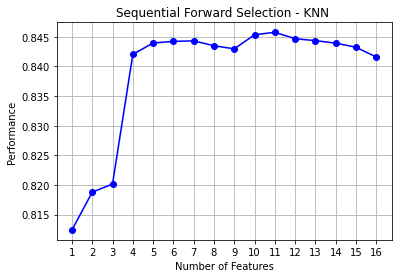

In [24]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#matplotlib.use( 'tkagg' )   # 1 option
fig0_k = plot_sfs(sfs0_k.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection - KNN ')
plt.grid()
plt.show()

In [25]:
### Backward Selection - kNN
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1_k = SFS(KNeighborsClassifier(),
           k_features=(3,16),
           forward=False,
           floating=False,
           scoring = scorer,
           cv = 0)
sfs1_k.fit(x,y)
sfs1_k.k_feature_names_

('Intake_type',
 'Intake_Condition',
 'Animal_Type',
 'Age_upon_Intake',
 'Mix_Breed',
 'Age_upon_Outcome',
 'Sex',
 'neuter/spay',
 'Days_in_shelter',
 'Trainability',
 'Breed_characteristic',
 'activity_level')

D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


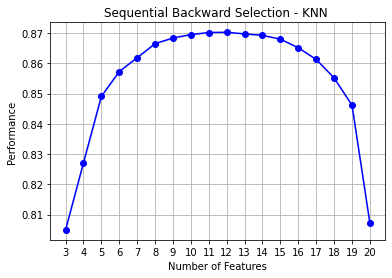

In [26]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#matplotlib.use( 'tkagg' )   # 1 option
fig1_K = plot_sfs(sfs1_k.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection - KNN ')
plt.grid()
plt.show()

#fig1.savefig('demo1.png', bbox_inches='tight')  # 2 option
#fig1.savefig('demo.pdf')   # 3 option

In [16]:
### Wrapper Bi Selection - KNN
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs2_K = SFS(KNeighborsClassifier(),
           k_features=(3,16),
           forward=True,
           floating=True,
           scoring = scorer,
           cv = 0)
sfs2_K.fit(x,y)
sfs2_K.k_feature_names_

('Intake_type',
 'Intake_Condition',
 'Animal_Type',
 'Age_upon_Intake',
 'Mix_Breed',
 'Age_upon_Outcome',
 'Sex',
 'neuter/spay',
 'Days_in_shelter',
 'Trainability',
 'Breed_characteristic',
 'activity_level')

D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


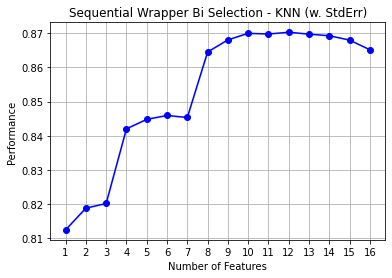

In [17]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#matplotlib.use( 'tkagg' )   # 1 option
fig2_K = plot_sfs(sfs2_K.get_metric_dict(), kind='std_dev')
plt.title('Sequential Wrapper Bi Selection - KNN (w. StdErr)')
plt.grid()
plt.show()

#fig2.savefig('demo2.png', bbox_inches='tight')
#fig2.savefig('demo.pdf')   # 3 option

# SVM (Feature Selection)

In [ ]:
### Forward Selection - SVM
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs0_s = SFS(SVC(),
             k_features=(3,16),
             forward=True,
             floating=False,
             scoring = scorer,
             cv = 0)
sfs0_s.fit(x,y)
sfs0_s.k_feature_names_

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#matplotlib.use( 'tkagg' )   # 1 option
fig0_s = plot_sfs(sfs0_s.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection - SVM ')
plt.grid()
plt.show()